In [164]:
import pandas as pd
from many_stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from unidecode import unidecode
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [165]:
data=pd.read_csv('dev-0/in.tsv', sep='\t', header=None)
data_test=pd.read_csv('test-A/in.tsv', sep='\t', header=None)

In [166]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [167]:
data[0] = data[0].str.lower()
data_test[0] = data_test[0].str.lower()
stop_words = get_stop_words('pl')

In [168]:
data[0] = data[0].apply(unidecode)
data_test[0] = data_test[0].apply(unidecode)
uni_stop_words = [unidecode(x) for x in stop_words]

In [169]:
data[0] = data[0].apply(remove_punctuations)
data_test[0] = data_test[0].apply(remove_punctuations)

In [170]:
data[0] = data[0].apply(lambda x: ' '.join([item for item in x.split() if item not in uni_stop_words]))
data_test[0] = data_test[0].apply(lambda x: ' '.join([item for item in x.split() if item not in uni_stop_words]))

In [171]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data[0])
text_test_tf= tf.fit_transform(data_test[0])

In [174]:
data[0]

0     opowiesc prawdziwa olsztyn akademik 7 pietro i...
1     podejrzewam polowaniu mowy prostu znalazl mart...
2     smutne przypomina historie balwankami wredny f...
3     kumpla zdawal walentynki polozyl koperte laski...
4     przypomniala krakowskich urban legends chyba n...
                            ...                        
82    wczoraj popoludniowej audycji trojce prowadzac...
83    sluchajcie uwielbiam opowiadacv sluchac jakies...
84    wczoraj probie koncertu czwartkowego akompania...
85    zuzanna mala historia przyszla panna mloda kup...
86    koszmar zaczyna niewinnego spotkania jednym to...
Name: 0, Length: 87, dtype: object

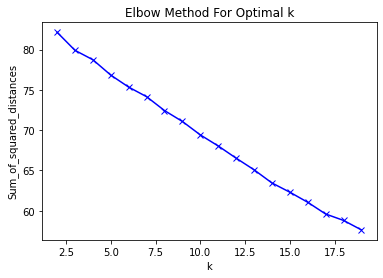

In [173]:
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(text_tf)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

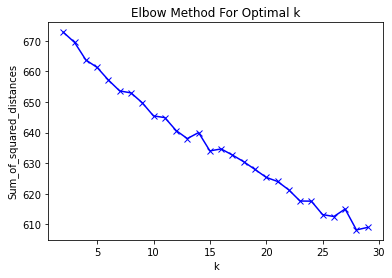

In [161]:
Sum_of_squared_distances = []
K = range(2,30)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(text_test_tf)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [175]:
true_k_dev = 10
model_dev = KMeans(n_clusters=true_k_dev, init='k-means++', max_iter=200, n_init=10)
model_dev.fit(text_tf)
labels_dev=model_dev.labels_
clusters_dev=pd.DataFrame(list(labels_dev),columns=['cluster'])

In [162]:
true_k_test = 28
model_test = KMeans(n_clusters=true_k_test, init='k-means++', max_iter=200, n_init=10)
model_test.fit(text_test_tf)
labels_test=model_test.labels_
clusters_test=pd.DataFrame(list(labels_test),columns=['cluster'])

In [177]:
clusters_dev.to_csv("dev-0\out.tsv", sep="\t",index=False,header=None)

In [163]:
clusters_test.to_csv("test-A\out.tsv", sep="\t",index=False,header=None)

In [178]:
clusters_dev

cluster
0         3
1         9
2         1
3         3
4         5
..      ...
82        1
83        5
84        2
85        7
86        5

[87 rows x 1 columns]